In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy.stats import skew
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import tensorflow as tf

In [3]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
t = df.dtypes.reset_index()
t['Type'] = np.where(t.loc[:, 0].astype(str).isin(['int64', 'float64']), 'Numerical', 'Categorical')
t.groupby('Type').size()

Type
Categorical    18
Numerical       3
dtype: int64

In [7]:


t[t['Type']=='Categorical']

,index,0,Type
0,customerID,object,Categorical
1,gender,object,Categorical
3,Partner,object,Categorical
4,Dependents,object,Categorical
6,PhoneService,object,Categorical
7,MultipleLines,object,Categorical
8,InternetService,object,Categorical
9,OnlineSecurity,object,Categorical
10,OnlineBackup,object,Categorical
11,DeviceProtection,object,Categorical


In [8]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [9]:
df['Partner'].unique()

array(['Yes', 'No'], dtype=object)

In [10]:
df['Dependents'].unique()

array(['No', 'Yes'], dtype=object)

In [11]:
df['PhoneService'].unique()

array(['No', 'Yes'], dtype=object)

In [12]:

df['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [13]:
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [14]:

df['OnlineSecurity'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [15]:
df['OnlineBackup'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [16]:
df['DeviceProtection'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [17]:
df['TechSupport'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [18]:
df['StreamingTV'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [19]:
df['StreamingMovies'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [20]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [21]:


df['PaperlessBilling'].unique()

array(['Yes', 'No'], dtype=object)

In [22]:

df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [23]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [24]:
df['MultipleLines'] = df['MultipleLines'].str.replace('No phone service','No')
df['OnlineSecurity'] = df['OnlineSecurity'].str.replace('No internet service','No')
df['OnlineBackup'] = df['OnlineBackup'].str.replace('No internet service','No')
df['DeviceProtection'] = df['DeviceProtection'].str.replace('No internet service','No')
df['TechSupport'] = df['TechSupport'].str.replace('No internet service','No')
df['StreamingTV'] = df['StreamingTV'].str.replace('No internet service','No')
df['StreamingMovies'] = df['StreamingMovies'].str.replace('No internet service','No')

In [25]:
df['MultipleLines'].unique()


array(['No', 'Yes'], dtype=object)

In [26]:

df['OnlineSecurity'].unique()

array(['No', 'Yes'], dtype=object)

In [27]:

df['OnlineBackup'].unique()

array(['Yes', 'No'], dtype=object)

In [28]:

df['DeviceProtection'].unique()

array(['No', 'Yes'], dtype=object)

In [29]:

df['TechSupport'].unique()

array(['No', 'Yes'], dtype=object)

In [30]:

df['StreamingTV'].unique()

array(['No', 'Yes'], dtype=object)

In [31]:

df['StreamingMovies'].unique()

array(['No', 'Yes'], dtype=object)

In [32]:
from sklearn.preprocessing import OrdinalEncoder

In [33]:
ord1=OrdinalEncoder(categories=[['Yes','No']])
ord2=OrdinalEncoder(categories=[['Month-to-month', 'One year', 'Two year']])
ord3=OrdinalEncoder(categories=[['Electronic check', 'Mailed check', 'Bank transfer (automatic)','Credit card (automatic)']])
ord4=OrdinalEncoder(categories=[['DSL', 'Fiber optic', 'No']])
ord5=OrdinalEncoder(categories=[['Female', 'Male']])

In [34]:
from sklearn.preprocessing import LabelEncoder 

In [35]:
le=LabelEncoder()

In [36]:
df['gender']=ord5.fit_transform(df[['gender']])
df['PaymentMethod']=ord3.fit_transform(df[['PaymentMethod']])
df['Contract']=ord2.fit_transform(df[['Contract']])
df['InternetService']=ord4.fit_transform(df[['InternetService']])

In [37]:

df['MultipleLines']=le.fit_transform(df[['MultipleLines']])
df['OnlineSecurity']=le.fit_transform(df[['OnlineSecurity']])
df['OnlineBackup']=le.fit_transform(df[['OnlineBackup']])
df['DeviceProtection']=le.fit_transform(df[['DeviceProtection']])
df['TechSupport']=le.fit_transform(df[['TechSupport']])
df['StreamingTV']=le.fit_transform(df[['StreamingTV']])
df['StreamingMovies']=le.fit_transform(df[['StreamingMovies']])
df['Partner']=le.fit_transform(df[['Partner']])
df['Dependents']=le.fit_transform(df[['Dependents']])
df['PhoneService']=le.fit_transform(df[['PhoneService']])
df['Churn']=le.fit_transform(df[['Churn']])
df['PaperlessBilling']=le.fit_transform(df[['PaperlessBilling']])

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [38]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0.0,0,1,0,1,0,0,0.0,0,...,0,0,0,0,0.0,1,0.0,29.85,29.85,0
1,5575-GNVDE,1.0,0,0,0,34,1,0,0.0,1,...,1,0,0,0,1.0,0,1.0,56.95,1889.5,0
2,3668-QPYBK,1.0,0,0,0,2,1,0,0.0,1,...,0,0,0,0,0.0,1,1.0,53.85,108.15,1
3,7795-CFOCW,1.0,0,0,0,45,0,0,0.0,1,...,1,1,0,0,1.0,0,2.0,42.30,1840.75,0
4,9237-HQITU,0.0,0,0,0,2,1,0,1.0,0,...,0,0,0,0,0.0,1,0.0,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1.0,0,1,1,24,1,1,0.0,1,...,1,1,1,1,1.0,1,1.0,84.80,1990.5,0
7039,2234-XADUH,0.0,0,1,1,72,1,1,1.0,0,...,1,0,1,1,1.0,1,3.0,103.20,7362.9,0
7040,4801-JZAZL,0.0,0,1,1,11,0,0,0.0,1,...,0,0,0,0,0.0,1,0.0,29.60,346.45,0
7041,8361-LTMKD,1.0,1,1,0,4,1,1,1.0,0,...,0,0,0,0,0.0,1,1.0,74.40,306.6,1


In [39]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.008414,-0.000863,-0.017021,-0.013773,-0.002105,-0.009212,-0.008393,-0.010487,0.000126,-0.011754,-0.005209,-0.014569,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.142948,-0.032310,-0.038653,0.066572,0.059428,-0.060625,0.105378,0.120176,-0.142554,0.156530,-0.093704,0.220173,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142057,0.000891,0.143106,0.141498,0.153786,0.119999,0.124666,0.117412,0.294806,-0.014877,0.133115,0.096848,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024526,0.044590,0.080972,0.023671,0.013963,0.063268,-0.016558,-0.039741,0.243187,-0.111377,0.123844,-0.113890,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.331941,-0.030359,0.327203,0.360277,0.360653,0.324221,0.279756,0.286111,0.671607,0.006152,0.340305,0.247900,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,0.279690,0.387436,-0.092893,-0.052312,-0.071227,-0.096340,-0.022574,-0.032959,0.002247,0.016505,-0.004070,0.247398,0.011942
MultipleLines,-0.008414,0.142948,0.142057,-0.024526,0.331941,0.279690,1.000000,0.011124,0.098108,0.202237,0.201137,0.100571,0.257152,0.258751,0.107114,0.163530,0.035851,0.490434,0.040102
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,0.011124,1.000000,-0.393013,-0.314737,-0.306805,-0.389382,-0.242532,-0.250343,0.099721,-0.138625,0.008124,-0.323260,-0.047291
OnlineSecurity,-0.017021,-0.038653,0.143106,0.080972,0.327203,-0.092893,0.098108,-0.393013,1.000000,0.283832,0.275438,0.354931,0.176207,0.187398,0.245530,-0.003636,0.163367,0.296594,-0.171226
OnlineBackup,-0.013773,0.066572,0.141498,0.023671,0.360277,-0.052312,0.202237,-0.314737,0.283832,1.000000,0.303546,0.294233,0.282106,0.274501,0.155085,0.126735,0.096550,0.441780,-0.082255


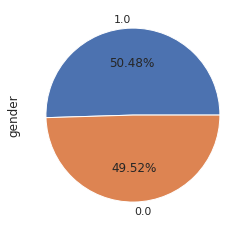

In [40]:
df['gender'].value_counts().plot(kind="pie", autopct="%.2f%%")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


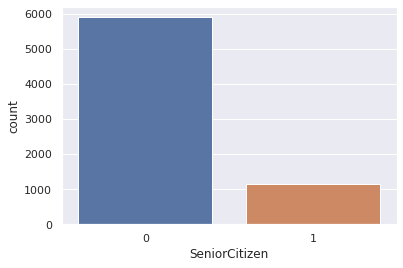

In [41]:
sns.countplot(df['SeniorCitizen']) #ratio of senior citizen and others in the company
plt.show()

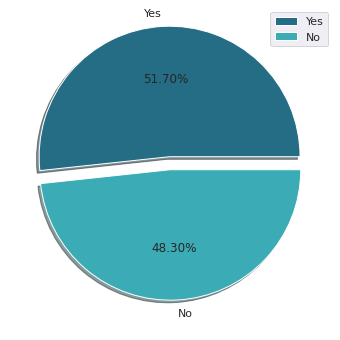

In [42]:
plt.figure(figsize= (10, 6)) #ratio between who has partners and not in our company
x = round(df["Partner"].value_counts()/df.shape[0]*100,2)
plt.pie(x,labels = ["Yes", "No"],  explode = [0.1,0], autopct= '%.2f%%', shadow= True, colors= ['#256D85', '#3BACB6'])
plt.legend()
plt.show()

In [43]:
round(df["Dependents"].value_counts()/df.shape[0]*100,2)

0    70.04
1    29.96
Name: Dependents, dtype: float64

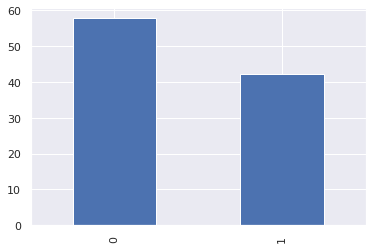

In [44]:
round(df['MultipleLines'].value_counts()/ df.shape[0]*100,2).plot.bar()#ratio between who has MultipleLines and not in our company

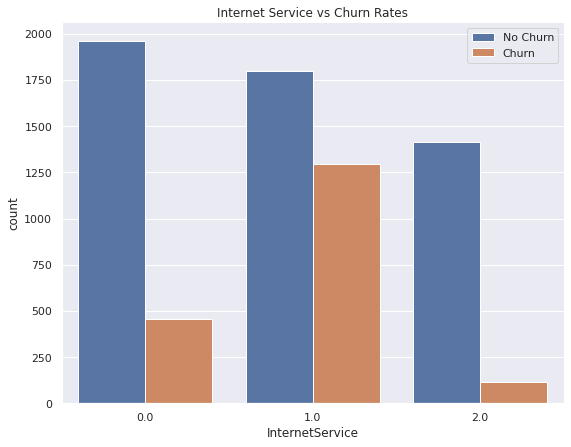

In [45]:
plt.figure(figsize=(9,7))#relationship between the Internet Services and the churn rate
ax = sns.countplot(x="InternetService", hue="Churn", data=df).set(title='Internet Service vs Churn Rates')
sns.despine()
plt.legend(title='', loc='upper right', labels=['No Churn', 'Churn'])
plt.show()

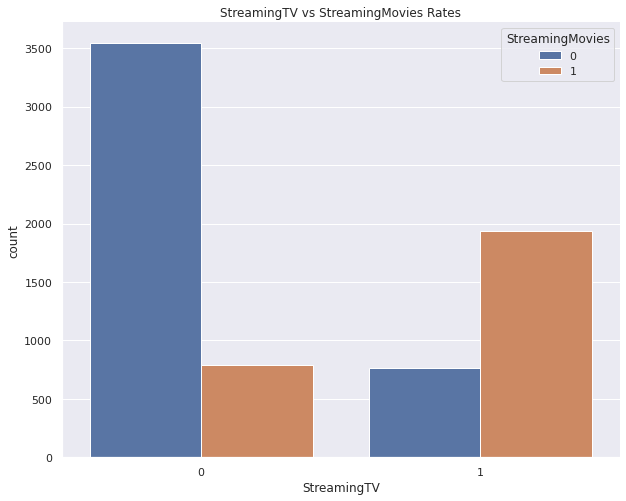

In [46]:
plt.figure(figsize=(10,8))#ratio between users who streaming movies to StreamingTV subscribers
ax = sns.countplot(x="StreamingTV", hue="StreamingMovies", data=df).set(title='StreamingTV vs StreamingMovies Rates')
sns.despine()
plt.show()

In [47]:
df.drop(['customerID'],axis=1,inplace=True)

In [48]:
X = df.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14]].values
y = df['Churn']

In [49]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, stratify= y, random_state= 40)

In [51]:
print(y_train.value_counts())
print(y_test.value_counts())

0    4139
1    1495
Name: Churn, dtype: int64
0    1035
1     374
Name: Churn, dtype: int64


In [52]:
models = {
    'logistic regression' : LogisticRegression(),
    'xgboost' : XGBClassifier(),
    'naive bayes' : GaussianNB(),
    'random forest' : RandomForestClassifier()
}

In [53]:
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f'{name} trained')

logistic regression trained
xgboost trained
naive bayes trained
random forest trained


In [54]:
results = {}

kf = KFold(n_splits= 25)

for name, model in models.items():
    result = cross_val_score(model, X_train, y_train, scoring= 'roc_auc', cv= kf)
    results[name] = result

In [55]:
for name, result in results.items():
    print("----------------")
    print(f'{name} : {np.mean(result)}')

----------------
logistic regression : 0.8251247141195188
----------------
xgboost : 0.8474756710718456
----------------
naive bayes : 0.8128284399820697
----------------
random forest : 0.80250289593802


***xgboost algorithm is the winner here as research also shows it is best algorith for churn analysis***

In [56]:

lr = LogisticRegression(
    solver = 'liblinear',
    tol = 0.008408625396645686,
    C = 0.08440490508701622,
    max_iter = 589,
    penalty = 'l1')

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred_prob = lr.predict_proba(X_test)[:, 1]

In [57]:
print("Actual values    :", y_test.values[:20])
print("Predicted values :", y_pred[:20])

Actual values    : [0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0]
Predicted values : [0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0]


In [58]:

predictions = pd.DataFrame({'Probability of Customer Churning': y_pred_prob, 'Probability of customer not churning' : 1 - y_pred_prob})
predictions.head()

,Probability of Customer Churning,Probability of customer not churning
0,0.008084,0.991916
1,0.068002,0.931998
2,0.263524,0.736476
3,0.104210,0.895790
4,0.535242,0.464758


In [ ]:
print('ROC AUC Score:', round(roc_auc_score(y_test, y_pred_prob), 3))

ROC AUC Score: 0.811


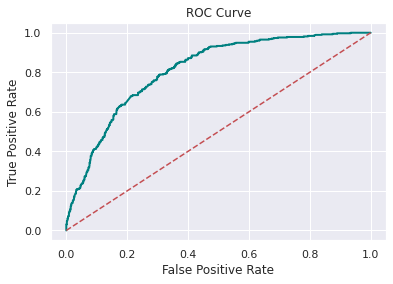

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2, color= 'teal')
plt.plot([0,1], [0,1], 'r--' )
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(X_train, y_train)  

SVC(kernel='linear', random_state=0)

In [ ]:
y_pred= classifier.predict(X_test) 

In [ ]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)
cm

array([[952,  83],
       [254, 120]])

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % (accuracy_score(y_test, y_pred)*100))

Accuracy: 76.08
